In [2]:
#Required libraries
import numpy as np 
import pandas as pd 
import seaborn as sns
import random
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [4]:
#Loading movies data using pandas
movies = pd.read_csv("C:/Users/messi/OneDrive/Documents/movies.csv")
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
#Loading ratings data using pandas
ratings = pd.read_csv("C:/Users/messi/OneDrive/Documents/ratings.csv")
ratings.head()

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


In [24]:
#Analyzing movies data
print('Size of movies data:',movies.shape,'\n')
print('Total number of movies:',len(movies["movieId"].unique()),'\n')
print('Columns in movies data:',movies.columns,'\n')
print('Checking whether there are any NULL entries:')
print(movies.isnull().sum(),'\n')
print('Genres in movies data:')
print(movies["genres"].unique(),'\n')
print('Total available genres:',len(movies["genres"].unique()))

Size of movies data: (58885, 3) 

Total number of movies: 58885 

Columns in movies data: Index(['movieId', 'title', 'genres'], dtype='object') 

Checking whether there are any NULL entries:
movieId    0
title      0
genres     0
dtype: int64 

Genres in movies data:
['Adventure|Animation|Children|Comedy|Fantasy'
 'Adventure|Children|Fantasy' 'Comedy|Romance' ...
 'Children|Comedy|Fantasy|Mystery' 'Children|Comedy|Crime|Fantasy'
 'Comedy|Horror|Mystery|Sci-Fi|Western'] 

Total available genres: 1621


In [25]:
#Analyzing ratings data
print('Size of ratings data:',ratings.shape,'\n')
print('Total number of movies:',len(ratings["movieId"].unique()),'\n')
print('Total number of ratings:',len(ratings["rating"]),'\n')
print('Columns in ratings data:',ratings.columns,'\n')
print('Checking whether there are any NULL entries:')
print(ratings.isnull().sum(),'\n')
good_ratings = ratings[ratings["rating"] >= 3.5]["rating"].count()
print("There are" , good_ratings , "good ratings given by users\n")
moderate_ratings = ratings[ratings["rating"] <= 3]["rating"].count()
print("There are" , moderate_ratings , "moderate ratings\n")
worse_ratings=0
for rating in ratings['rating']:
    if rating == 0.5: worse_ratings=worse_ratings+1
print("There are" , worse_ratings , "worse ratings")

Size of ratings data: (25000095, 4) 

Total number of movies: 59047 

Total number of ratings: 25000095 

Columns in ratings data: Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object') 

Checking whether there are any NULL entries:
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64 

There are 15630129 good ratings given by users

There are 9369966 moderate ratings

There are 393068 worse ratings


In [26]:
#Limiting ratings to the users that have rated more that 100 movies
#Otherwise it becomes impossible to pivot the rating dataframe later for collaborative filtering
ratings_filtered = ratings.groupby('userId').filter(lambda x: len(x) >= 50)

#98% of the original movie titles in ratings data frame
print(len(ratings_filtered.movieId.unique())/len(movies.movieId.unique()) * 100)

#List the movie titles that survive the filtering
movie_list = ratings_filtered.movieId.unique().tolist()

#Filtering the movies data frame
movies = movies[movies.movieId.isin(movie_list)]

100.0


[Text(0.5, 0, 'Rating'), Text(0, 0.5, 'Number of ratings (in Millions)')]

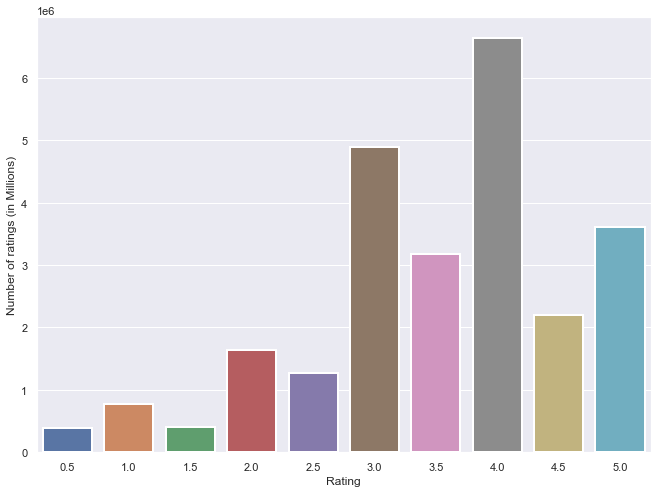

In [27]:
#Plotting the ratings
sns.set(rc={'figure.figsize':(11,8)})
sns_plot = sns.countplot(data = ratings , x = "rating", linewidth=2)
sns_plot.set( xlabel='Rating', ylabel='Number of ratings (in Millions)')

In [28]:
#movie id and title from movies.csv
movie = movies.loc[:,["movieId","title"]]
movie.head()

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


In [29]:
#user id, movie id and rating from ratings.csv
rating = ratings.loc[:,["userId","movieId","rating"]]
rating.head()

,userId,movieId,rating
0,1,296,5.0
1,1,306,3.5
2,1,307,5.0
3,1,665,5.0
4,1,899,3.5


In [30]:
#Merge movie and rating data
data = pd.merge(movie,rating)

#Testing with the first 1 Million entries
data = data.iloc[:1000000,:]
data = data.sample(frac=1)


data.head()

,movieId,title,userId,rating
634531,50,"Usual Suspects, The (1995)",136729,5.0
825543,104,Happy Gilmore (1996),151706,4.0
596016,50,"Usual Suspects, The (1995)",23308,4.0
343537,27,Now and Then (1995),58602,5.0
411385,32,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),156445,3.0


In [31]:
#Transforming the words into numerical data
tf = TfidfVectorizer(sublinear_tf=True, max_df=0.5, stop_words='english')
tfidf_matrix = tf.fit_transform(data['title'])
tfidf_matrix.shape

(1000000, 297)

In [32]:
#Creating the pivot table
pivot_table = data.pivot_table(index = ["userId"],columns = ["title"],values = "rating")
pivot_table.head()

title,Ace Ventura: When Nature Calls (1995),Across the Sea of Time (1995),"American President, The (1995)",Angela (1995),Angels and Insects (1995),Anne Frank Remembered (1995),Antonia's Line (Antonia) (1995),Assassins (1995),Babe (1995),Bad Boys (1995),...,Unforgettable (1996),Up Close and Personal (1996),"Usual Suspects, The (1995)",Vampire in Brooklyn (1995),Waiting to Exhale (1995),When Night Is Falling (1995),"White Balloon, The (Badkonake sefid) (1995)",White Squall (1996),Wings of Courage (1995),"Young Poisoner's Handbook, The (1995)"
userId,,,,,,,,,,,,,,,,,,,,,
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
#Randomly selecting a movie from the data
movie_watched = pivot_table.iloc[:,random.randint(0, pivot_table.shape[1])]

#Finding the similarity with other movies
similarity_with_other_movies = pivot_table.corrwith(movie_watched)
similarity_with_other_movies.sort_values(ascending=False).head()

title
Nico Icon (1995)                  1.000000
Guardian Angel (1994)             1.000000
Shopping (1994)                   0.948683
Kids of the Round Table (1995)    0.930261
Big Bully (1996)                  0.923186
dtype: float64

In [34]:
#Getting input from user. Here I'm using "Toy Story (1995)" as input
movie_title = input()
movie_watched = pivot_table[movie_title]
similarity_with_other_movies = pivot_table.corrwith(movie_watched)
similarity_with_other_movies.sort_values(ascending=False).head()

Toy Story (1995)


title
Toy Story (1995)                 1.000000
Shadows (Cienie) (1988)          0.592258
Across the Sea of Time (1995)    0.488717
Angela (1995)                    0.476685
Guardian Angel (1994)            0.456041
dtype: float64